<a href="https://colab.research.google.com/github/alejandrofonsecacuza/Assest/blob/master/Practica_Laboral_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
#!pip install pathlib
#!pip install patool

In [ ]:
# prompt: find the image set in google drive
import tensorflow as tf
import numpy as np
from google.colab import drive
from PIL import Image,ImageEnhance
import matplotlib.pyplot as plt
import os
import pathlib
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#import patoolib

# Replace with the actual path to your .rar file in Google Drive
#rar_file_path = '/gdrive/MyDrive/Clase Práctica 3/image_set.rar'
extract_path = '/content/extracted_dataset'

#patoolib.extract_archive(rar_file_path, outdir=extract_path)


INFO patool: Extracting /gdrive/MyDrive/Clase Práctica 3/image_set.rar ...
INFO:patool:Extracting /gdrive/MyDrive/Clase Práctica 3/image_set.rar ...
INFO patool: ... creating output directory `/content/extracted_dataset'.
INFO:patool:... creating output directory `/content/extracted_dataset'.
INFO patool: running /usr/bin/unrar x -- "/gdrive/MyDrive/Clase Práctica 3/image_set.rar"
INFO:patool:running /usr/bin/unrar x -- "/gdrive/MyDrive/Clase Práctica 3/image_set.rar"
INFO patool:     with cwd='/content/extracted_dataset', input=''
INFO:patool:    with cwd='/content/extracted_dataset', input=''
INFO patool: ... /gdrive/MyDrive/Clase Práctica 3/image_set.rar extracted to `/content/extracted_dataset'.
INFO:patool:... /gdrive/MyDrive/Clase Práctica 3/image_set.rar extracted to `/content/extracted_dataset'.


'/content/extracted_dataset'

In [ ]:
# prompt: ahora muestra el contenido de extract_path donde se supone que descromprimiste la data
folders={'EA':1,'EP':2,'EH Simple':3,'EH Complex':4,'NE Follicular':5,'NE Luteal':6}
imagenes=[]
targets=[]

bright_factor=1.4
contrast_factor=1.8

import os
path=extract_path+'/image_set';
for name_folder in os.listdir(path):
    full_path=os.path.join(path,name_folder)
    #print(full_path)
    for image in os.listdir(full_path):
        print(image)
        full_image_path=os.path.join(full_path,image)
        if(full_image_path.endswith("JPG")):
            img=Image.open(full_image_path)
            img=img.resize((80,60))#Keep ratio aspect of original images

            #imagenes.append(img)
            targets.append(folders[name_folder])
            img_t=img.transpose(Image.FLIP_LEFT_RIGHT)

            img_b=ImageEnhance.Brightness(img).enhance(bright_factor)
            imagenes.append(img_b)
            targets.append(folders[name_folder])

            img_c=ImageEnhance.Contrast(img_t).enhance(contrast_factor)
            imagenes.append(img_c)
            targets.append(folders[name_folder])

/content/extracted_dataset/image_set/NE Luteal
30.JPG
133.JPG
1606843.JPG
1810777-4.JPG
B1714049.JPG
42.JPG
29.JPG
49.JPG
1810873-4.JPG
1812764-2.JPG
1513443.JPG
1804688-9.JPG
1804741-10.JPG
1806424.JPG
Thumbs.db
91.JPG
B1714423-3(1).JPG
1604504.JPG
B1714642-2(1).JPG
1807790.JPG
0123-65.JPG
84.JPG
32.JPG
1810777-3.JPG
118.JPG
1801591.JPG
1804607-12.JPG
1807207.JPG
1801434ú¿2ú®.JPG
1512570.JPG
28.JPG
46.JPG
15.JPG
1605796ú¿2ú®.JPG
136.JPG
1601779.JPG
61.JPG
1810209-5.JPG
0123-35.JPG
154.JPG
1812956-5.JPG
0123-41.JPG
116.JPG
0123-80.JPG
B1714045-1(3).JPG
1609600ú¿2ú®.JPG
163.JPG
B1714642-2(3).JPG
1812194-5.JPG
b1714560.JPG
117.JPG
1802282.JPG
0123-10.JPG
0123-39.JPG
1513085.JPG
1605191.JPG
1513011ú¿2ú®.JPG
0123-83.JPG
171.JPG
1604310.JPG
1718058-7b.JPG
1802003ú¿2ú®.JPG
1806886(2).JPG
137.JPG
43.JPG
0123-55.JPG
1801588.JPG
0123-52.JPG
1800094ú¿2ú®.JPG
1717948-2a.JPG
0123-57.JPG
B1714077-1(1).JPG
1717948-2b.JPG
83.JPG
1805972.JPG
B1714644-2.JPG
1804688-4.JPG
B1714520-6(1).JPG
99.JPG
180468

In [ ]:
print(len(targets))
img_array=np.array(imagenes)
print(img_array.shape)

9843
(9843, 60, 80, 3)


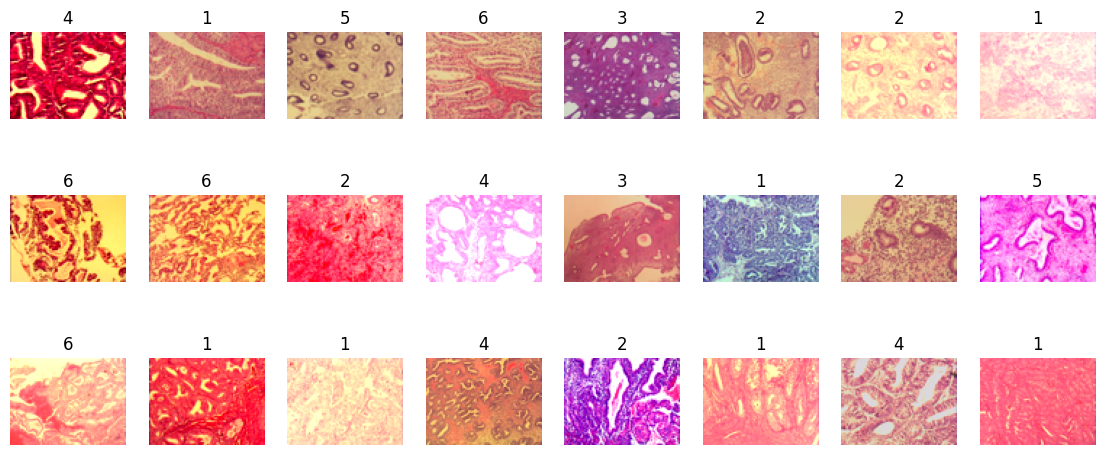

In [ ]:
plt.figure(figsize=(14,6))
for i in range(24):
  plt.subplot(3, 8, i + 1)
  ran=np.random.randint(img_array.shape[0])
  plt.imshow(imagenes[ran])
  plt.title(targets[ran])
  plt.axis("off")

plt.show()


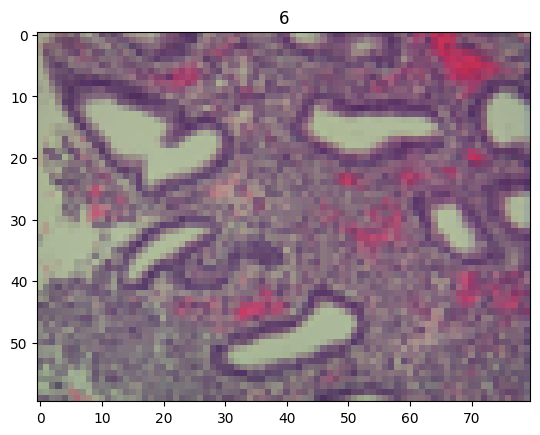

In [ ]:
ran=np.random.randint(img_array.shape[0])

plt.title(targets[ran])

plt.imshow(img_array[ran])
plt.show()


In [33]:
#Normalizer
img_array=img_array/ 255


In [35]:
# prompt: unir el arreglo img_array y targets , luego barajarlo (shuffle) y despues volver a separarlo . Esto para que este en un orden aleatorio

# Unir los arreglos
combined = list(zip(img_array, targets))

# Barajar el arreglo combinado
import random
random.shuffle(combined)

# Separar los arreglos
img_array, targets = zip(*combined)

# Convertir a arreglos numpy de nuevo
img_array = np.array(img_array)
targets = np.array(targets)

print(img_array.shape)
print(targets.shape)



(9843, 60, 80, 3)
(9843,)


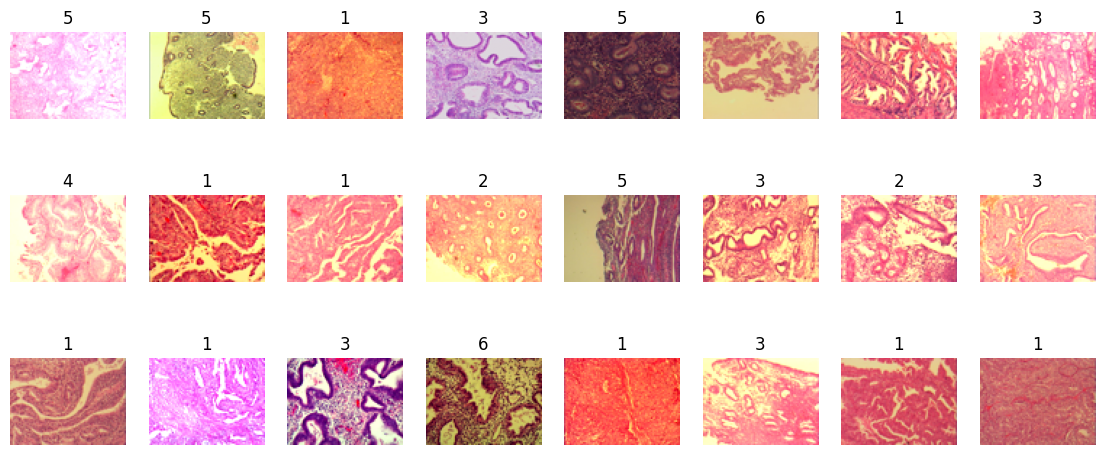

In [37]:
plt.figure(figsize=(14,6))
for i in range(24):
  plt.subplot(3, 8, i + 1)
  plt.imshow(img_array[i])
  plt.title(targets[i])
  plt.axis("off")

plt.show()

In [39]:

from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba  (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(
    img_array, targets, test_size=0.3, random_state=42
)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6890, 60, 80, 3)
(2953, 60, 80, 3)
(6890,)
(2953,)


In [44]:
# prompt: Genera un modelo de tensorflow que se le puedan entrar las imagenes de x_train

# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(60, 80, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(7, activation='softmax')  # 7 clases de salida
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
216/216 [==============================] - 57s 252ms/step - loss: 1.7509 - accuracy: 0.2319
Epoch 2/10
216/216 [==============================] - 56s 260ms/step - loss: 1.6791 - accuracy: 0.2913
Epoch 3/10
216/216 [==============================] - 56s 260ms/step - loss: 1.6014 - accuracy: 0.3489
Epoch 4/10
216/216 [==============================] - 54s 250ms/step - loss: 1.4857 - accuracy: 0.4123
Epoch 5/10
216/216 [==============================] - 56s 261ms/step - loss: 1.3459 - accuracy: 0.4663
Epoch 6/10
216/216 [==============================] - 56s 259ms/step - loss: 1.2201 - accuracy: 0.5197
Epoch 7/10
216/216 [==============================] - 56s 257ms/step - loss: 1.0773 - accuracy: 0.5753
Epoch 8/10
216/216 [==============================] - 56s 259ms/step - loss: 0.9466 - accuracy: 0.6263
Epoch 9/10
216/216 [==============================] - 54s 251ms/step - loss: 0.8073 - accuracy: 0.6890
Epoch 10/10
216/216 [==============================] - 56s 257ms/step - l

In [57]:
perdida, exactitud = model.evaluate(X_test, y_test)
print("Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba):", exactitud)

93/93 [==============================] - 1s 4ms/step - loss: 1.7720 - accuracy: 0.2638
Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba): 0.2637995183467865


93/93 [==============================] - 0s 4ms/step


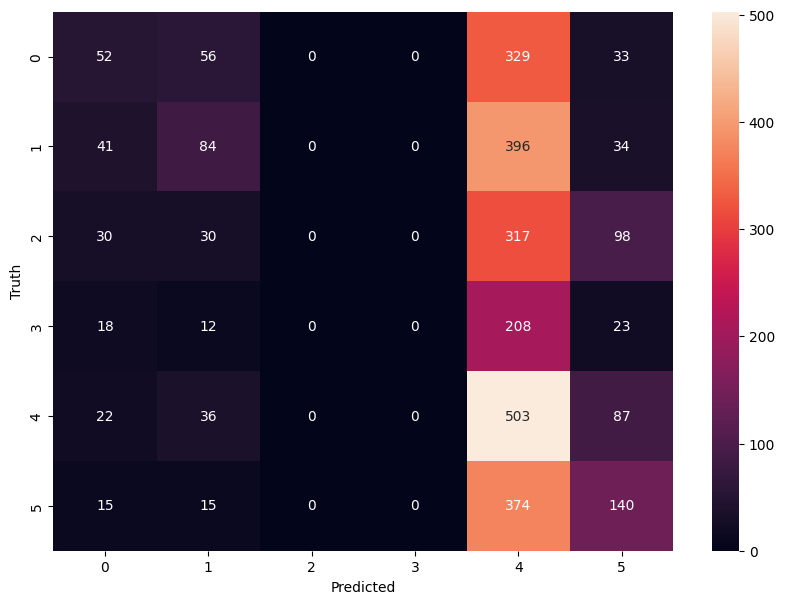

In [65]:
# prompt: A partir del modelo y los datos de prueba genera has una matriz de Confucion

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


93/93 [==============================] - 0s 4ms/step


2728